# Se realizó entre Anny Diossa y Sara Carvajal

In [ ]:
import numpy as np
from scipy import misc
import random
import matplotlib.pyplot as plt
from scipy import integrate
import scipy.optimize as op
import sympy as sp 
from matplotlib import lines
from numpy.core.function_base import linspace
from sympy.interactive import init_printing
import pandas as pd

#Punto (1). DERIVADAS#


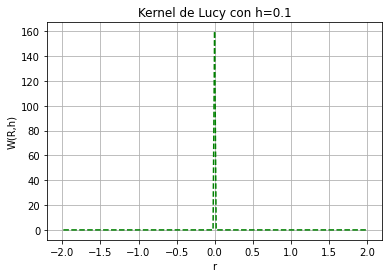

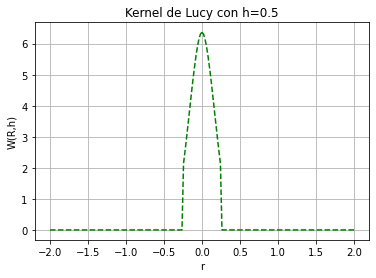

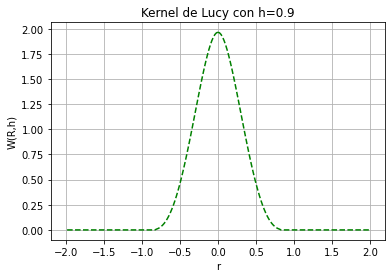

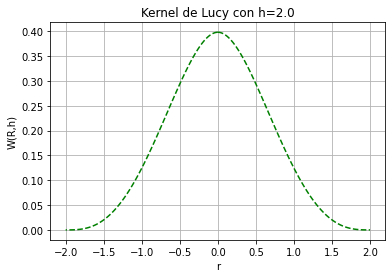

In [ ]:

hs= np.array([0.1,0.5,0.9,2])

def fun(q, h):
  cons = 5/(np.pi*(h**2))
  return cons*(1+3*q)*(1-q)**3 if q>= 0 and q <h else 0

def graph(hs): 
  cons = 5/(np.pi*(hs**2))
  r =np.linspace(0,2,100)
  q = r/hs

  w = [fun(qi,hs) for qi in q]
  plt.grid()
  plt.title(f"Kernel de Lucy con h={hs}")
  plt.xlabel("r")
  plt.ylabel("W(R,h)")
  plt.plot(r,w,"g--")
  plt.plot(-r,w,"g--")
  plt.show()

for i in range(len(hs)):
  graph(hs[i])

La derivada del Kernel de Lucy en el intervalo h> q >=0 : 


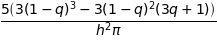

In [ ]:
#CALCULO DE LA DERIVADA
sp.init_printing(use_unicode=True)

x = sp.Symbol('q')
h1 =sp.Symbol("h")
pi= sp.Symbol('π')
cons1= 5/(pi*(h1**2))

y = (1+3*x)*(1-x)**3 

dev= cons1 *sp.diff(y,x)
print("La derivada del Kernel de Lucy en el intervalo h> q >=0 : ")
dev

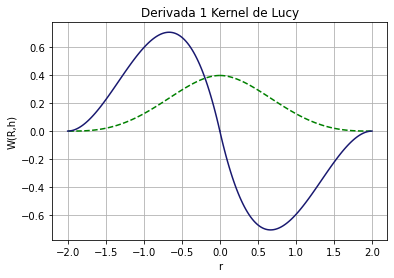

In [ ]:
#GRÁFICO DE LA DERIVADA
h=2.0
cons = 5/(np.pi*(h**2))
r =np.linspace(0,2,100)
q = r/h
w = [fun(qi,h) for qi in q]
derr=cons*(3*(1 - q)**3 - 3*(1 - q)**2*(3*q + 1))

plt.grid()
plt.title("Derivada 1 Kernel de Lucy")
plt.xlabel("r")
plt.ylabel("W(R,h)")
plt.plot(r,w,"g--")
plt.plot(-r,w,'g--')
plt.plot(r,derr,'midnightblue')
plt.plot(-r,-derr,'midnightblue')

In [ ]:
#Calculos en 3D

def fun2(h, q):
  cons = 105/16*(np.pi*(h**3))
  return cons*(1+3*q)*(1-q)**3 if q>= 0 and q <h else 0

def fun2der(h,q):
  return 105*(3*(1 - q)**3 - 3*(1 - q)**2*(3*q + 1))/(16*h**3*np.pi)
  
#La derivada de la función es:
cons2= 105/(16*(pi*(h1**3)))
derr2= cons2*sp.diff(y,x)

In [ ]:
x= np.linspace(-1,1,100)
X,Y= np.meshgrid(x,x)
R=np.sqrt((X**2+Y**2))

In [ ]:
W=np.vectorize(fun2)
H1= np.vectorize(fun2der)

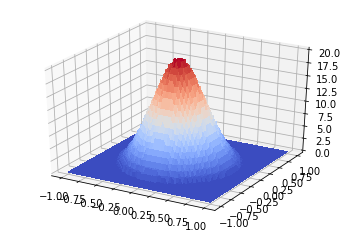

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, W(1,R), cmap=cm.coolwarm,linewidth=0, antialiased=False)


La gráfica de la derivada del kernel de lucy en 3D es:


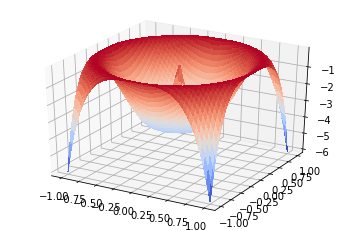

In [ ]:
print('La gráfica de la derivada del kernel de lucy en 3D es:')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, H1(1,R), cmap=cm.coolwarm,linewidth=0, antialiased=False)


#1.  Integral con regla del Trapecio

En general, la regla del Trapecio es

$$a=x_0$$

$$b=x_n$$

$$n=N-1$$

$$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) + E[f]
$$

Para $N=2$ se tiene que

$$I=\int_a^b dx f(x) \approx \frac{h}{2} (f(a)+f(b))+E[f]$$

El error esta dado por

$$E[f]=-\frac{h^3}{12} f''(\xi)$$

donde $\xi\in [b,a]$, $h=a-b$

#2. Integral con regla del Simpson

En general, la regla de simpson es

$$a=x_0$$

$$b=x_n$$

$$n=N-1$$
 
$$
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n-1)}f(x_{2i}) + 4\sum_{i=1}^{n}f(x_{2i-1}) + f(b)\right] + E[f]
,$$

Para $N=3$ se tiene que
$$I=\int_{x_0}^{x_2} dx f(x) \approx \frac{h}{3} (f(x_0)+4f(x_1)+f(x_2)) + E[f]$$


 El error esta dado por:

$$E[f]=-\frac{h^5}{90} f^{4}(\xi)$$

donde $\xi\in [b,a]$, $h=\frac{(a-b)}{2}$


#3.  Integral con el método de Cuadratura


$$a=x_0$$


$$b=x_n$$


$$n=N-1$$


$$f(x) \approx P_n(x) = \sum_{i}^{n} f(x_i) L_{n,i}(x)$$


$$L_{n,i}(x)=\prod_{m}^{n} \frac{x-x_m}{x_i-x_m} \text{ con } m\neq i$$


$$\int_a^b dx f(x) \approx \int_a^b dx P_n(x) = \int_a^b dx \sum_{i}^{n} f(x_i) L_{n,i}(x) = \sum_{i}^{n} \int_a^b dx f(x_i) L_{n,i}(x)$$

$$ I = \sum_{i}^{n} \int_a^b dx f(x_i) L_{n,i}(x) + E[f]$$

El error esta dado por

$$E[f] = \frac{1}{(n+1)!} \int_a^b dx \prod_i^n (x-x_i)f^{n+1}(\xi(x))$$

donde $\xi\in [b,a]$


#4.  calculo de las integrales con los métodos 1, 2 y 3

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


In [ ]:
def f(x):
    return np.exp(1-np.sqrt(x))

a = 0
b = np.pi
x = linspace(a, b, 100000)
It = integrate.trapz(f(x),x)
Is = integrate.simps(f(x),x)
Ic = integrate.quad(f,a, b)
print(f"Método Trapecio: {It}")
print(f"Método Simpson: {Is}")
print(f"Método Cuadratura: {Ic[0]}, el error es {Ic[1]}")

Método Trapecio: 2.87549123482166
Método Simpson: 2.8754911950557434
Método Cuadratura: 2.8754911354375863, el error es 1.982119357535339e-09


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [ ]:
def f1(x):
    return 1/np.sqrt(np.tan(x))

#La función presenta indeterminación en 0, por lo cual se escoge un numero muy cercano 
a1 = 0.0000001
b1 = np.pi/2
x = np.linspace(a1, b1,100000)
It1 = integrate.trapz(f1(x),x)
Is1 = integrate.simps(f1(x),x)
Ic1 = integrate.quad(f1, x[0],x[-1])
print(f"Método Trapecio: {It1}")
print(f"Método Simpson: {Is1}")
print(f"Método Cuadratura: {Ic1[0]}, el error es {Ic1[1]}")

Método Trapecio: 2.2404574057065116
Método Simpson: 2.2366471905948755
Método Cuadratura: 2.221441470449767, el error es 1.8618846464590888e-08


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [ ]:
import numpy as np
import sympy as sp
def f2(x):
    return 1 /(1+(x**2))

a1= -100000
b1= 1000000
a2= np.NINF
b2= np.inf
x1 = np.linspace(a1, b1,10000000)

It2 = integrate.trapz(f2(x1),x1)
Is2 = integrate.simps(f2(x1),x1)
Ic2 = integrate.quad(f2,a2,b2)
print(f"Método Trapecio: {It2}")
print(f"Método Simpson: {Is2}")
print(f"Método Cuadratura: {Ic2[0]}, el error es {Ic2[1]}")


Método Trapecio: 3.1415816535897996
Método Simpson: 3.1415816535897965
Método Cuadratura: 3.141592653589793, el error es 5.155583041103855e-10


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


In [ ]:
#LA PRIMERA INTEGRAL EVALUADA A MANO ES COS(x)**3-SIN(x)**3
%pylab
import sympy as sp 

def f3(x):
    return np.cos(x)**3-np.sin(x)**3

a3= 0
b3= np.pi/4
x2= np.linspace(0,pi/4,1000)

It3 = integrate.trapz(f3(x2),x2)
Is3 = integrate.simps(f3(x2),x2)
Ic3 = integrate.quad(f3, a3,b3)
print(f"Método Trapecio: {It3}")
print(f"Método Simpson: {Is3}")
print(f"Método Cuadratura: {Ic3[0]}, el error es {Ic3[1]}")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
Método Trapecio: 0.5118445260477336
Método Simpson: 0.5118446352500744
Método Cuadratura: 0.5118446353109126, el error es 5.682616991530416e-15


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$

In [ ]:
def f4(x):
    return 1/np.log(x)

a4 = np.exp(1)
b4 = 2*np.exp(1)
x = linspace(a4, b4, 100000)
It4 = integrate.trapz(f4(x),x)
Is4 = integrate.simps(f4(x),x)
Ic4 = integrate.quad(f4,a4,b4)
print(f"Método Trapecio: {It4}")
print(f"Método Simpson: {Is4}")
print(f"Método Cuadratura: {Ic4[0]}, el error es {Ic4[1]}")

Método Trapecio: 2.003810561642726
Método Simpson: 2.0038105616240243
Método Cuadratura: 2.0038105616240243, el error es 2.2246766225020577e-14


# Punto 6

In [ ]:
g = 9.832
R = 6371*10**3

I=integrate.quad(lambda z: z**-2,1,np.inf)

v = np.sqrt(2*g*R*I[0])
print(f'La velocidad de escape es: {v} m/s')

La velocidad de scape es: 11192.825559258932 m/s


In [ ]:
#PUNTO 6.1

#Se define primero la funcion y el valor de la integral 

def f(t):
    return np.exp(-t)

def exacto(t):
    return t-np.exp(-t)
exacto(1)

0.6321205588285577

In [ ]:
def N(n):
    n1=np.linspace(0,n,100000)
    return [integrate.quad(f,0,n)[0],integrate.simps(f(n1),n1),integrate.trapz(f(n1),n1)]

N(1)

[0.6321205588285578, 0.6321205588285577, 0.6321205588338255]

In [ ]:
#Definición de error relativo

def E(n):
    error= abs(N(n)-exacto(n))/exacto(n)
    return error

In [ ]:
#Tabla de errores relativos con diferentes metodos
Error = {"N": ["εG","εS","εT"],
         "2" : E(2),
         "10": E(10),
         "20": E(20),
         "40": E(40),
         "80": E(80),
         "160": E(160)}

df = pd.DataFrame(Error)
df

,N,2,10,20,40,80,160
0,εG,0.536289,0.900004,0.95,0.975,0.9875,0.99375
1,εS,0.536289,0.900004,0.95,0.975,0.9875,0.99375
2,εT,0.536289,0.900004,0.95,0.975,0.9875,0.99375
